# Learning curve

### import modules and configure notebook

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from functions.eval_data import learningCurve

pd.set_option('max.rows', None)
pd.set_option('max.columns', None)
%matplotlib inline

### Load variables stored by data_preproccessing notebook

In [2]:
%store -r train_data_formodel
%store -r test_data
%store -r my_data
%store -r uniques
%store -r best_feats


### configurations
* save_plots -> boolean


In [3]:
save_plots = True

In [4]:
from config_and_dependencies.config import * 

### counts of instances in all classes before oversampling

In [5]:
train_data_formodel['class'].value_counts()

4     105
17    100
18     61
0      53
10     47
13     45
15     36
16     36
2      36
12     30
11     30
8      30
7      30
5      30
6      27
9      27
1      24
14     21
3      18
Name: class, dtype: int64

### The class column is stored as the variable y and the variables identified as best by the 2 feature_selection notebook are used as features

In [6]:
y = np.array(train_data_formodel['class'])
X = np.array(train_data_formodel[best_feats])

### call function for plotting learning curve 

In [7]:
rfc_lc = learningCurve(RandomForestClassifier(n_estimators=1000, random_state = random_seed_state, n_jobs=-1, 
                              min_samples_split =  3, min_samples_leaf = 1, max_features = 'auto', 
                              max_depth = 100, bootstrap =  True), X, y, cv = 5, train_sizes = np.linspace(0.1, 1.0, 20))

[learning_curve] Training set sizes: [ 62  91 121 150 180 209 238 268 297 327 356 386 415 445 474 504 533 563
 592 622]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of 100 | elapsed:   26.8s remaining:   26.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   53.9s finished


### visualise learning curve for Random Forest Classifier

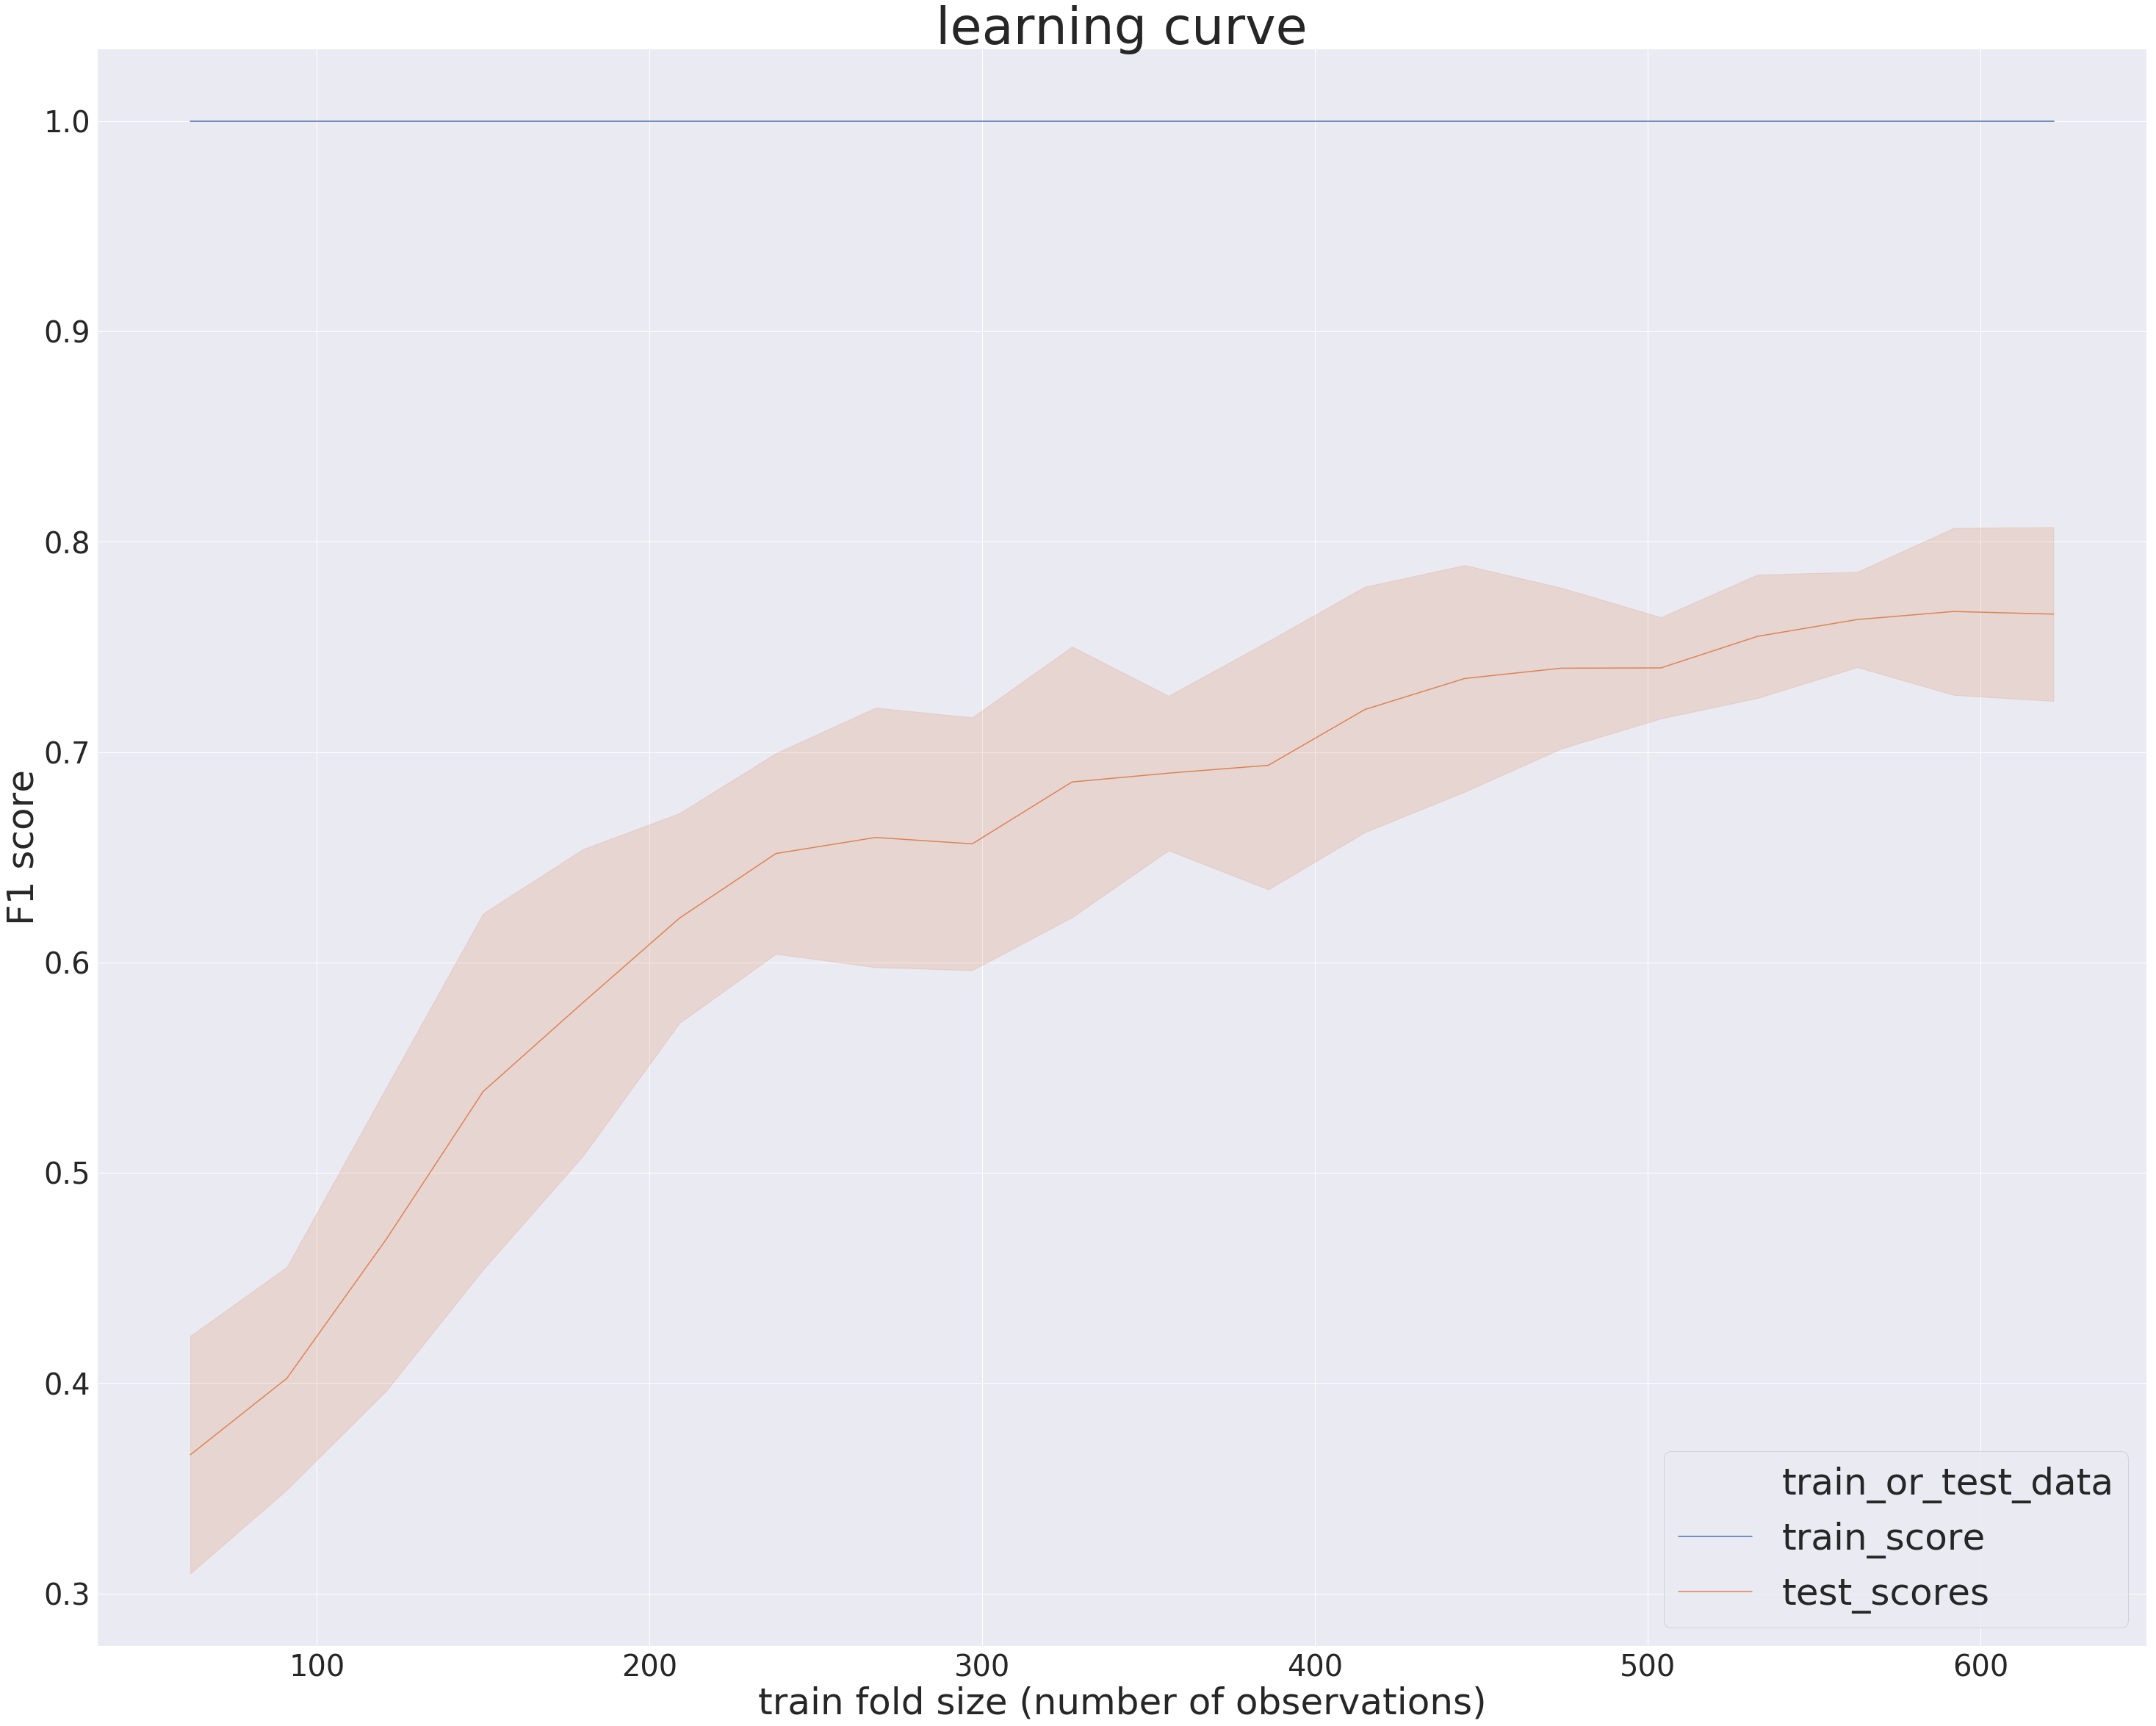

In [16]:
sns.set(rc={'figure.figsize':(50,40)})
plot = sns.lineplot(x = 'train_sizes', y = 'k_fold_stratified_scores', hue = 'train_or_test_data' ,data = rfc_lc, ci = 'sd', markers = "o")
plot.set_xlabel("train fold size (number of observations)",fontsize=50)
plot.set_ylabel("F1 score",fontsize=50)
plot.set_title('learning curve', fontsize = 70)
plot.set_xlabel("train fold size (number of observations)",fontsize=50)
plot.tick_params(labelsize=40)

plt.legend(fontsize = 50, loc = 4)

if save_plots == True:
    fig = plot.get_figure()
    fig.savefig('figures/training_curve.png')


In [9]:
rfc_lc.to_csv('output_datasets/rfc_lc.csv')